# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [3]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
RBA:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
client:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
producer:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
production:
  0: NV(NUM)
  1: NP(NUM)
  2: QTE(NUM)
purchase:
  0: NB(NUM)
  1: NV(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: REGION(TEXT)
  5: QTE(NUM)
wine:
  0: NV(NUM)
  1: DEGRE(NUM)
  2: MILL(NUM)
  3: CRU(TEXT)


Again, we will use **`%%sql`** magic for our queries

In [4]:
%load_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

In [30]:
%%sql DROP TABLE IF EXISTS producer;
DROP TABLE IF EXISTS wine;
DROP TABLE IF EXISTS production;

-- Create producer table
CREATE TABLE producer AS
SELECT DISTINCT NP, NOM, PRENOM, REGION
FROM MASTER1
WHERE NP IS NOT NULL;

-- Create wine table
CREATE TABLE wine AS
SELECT DISTINCT NV, DEGRE, MILL, CRU
FROM MASTER1
WHERE NV IS NOT NULL;

-- Create production table
CREATE TABLE production AS
SELECT DISTINCT NV, NP, QTE
FROM MASTER1
WHERE NV IS NOT NULL;

DROP TABLE IF EXISTS client;
DROP TABLE IF EXISTS purchase;

-- Create client table
CREATE TABLE client AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM MASTER2
WHERE NB IS NOT NULL;

-- Create purchase table
CREATE TABLE purchase AS
SELECT DISTINCT NB, NV, DATES, LIEU, REGION, QTE
FROM MASTER2
WHERE QTE IS NOT NULL
ORDER BY NB;

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [31]:
%%sql
DROP VIEW IF EXISTS bons_buveurs;
CREATE VIEW bons_buveurs AS
SELECT *
FROM client
WHERE TYPE IN ('gros', 'moyen');

 * sqlite:///wine.db
Done.
Done.


[]

In [32]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [33]:
%%sql
DROP VIEW IF EXISTS buveurs_asec;
CREATE VIEW buveurs_asec AS
    SELECT client.NB, client.NOM, client.PRENOM, client.TYPE FROM client LEFT JOIN
        purchase ON purchase.NB = client.NB 
    WHERE NV IS NULL
    ORDER BY client.NB 

 * sqlite:///wine.db
Done.
Done.


[]

In [34]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [35]:
%%sql
DROP VIEW IF EXISTS buveurs_achats;
CREATE VIEW buveurs_achats AS
    SELECT DISTINCT client.NB, client.NOM, client.PRENOM, client.TYPE FROM client LEFT JOIN
        purchase ON purchase.NB = client.NB 
    WHERE NV IS NOT NULL
    ORDER BY client.NB 

 * sqlite:///wine.db
Done.
Done.


[]

In [36]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [11]:
%%sql
DROP VIEW IF EXISTS q83pl;
CREATE VIEW q83pl AS
    SELECT purchase.LIEU, wine.CRU, SUM(QTE) AS QTE_TOTALE FROM purchase
    JOIN wine ON wine.NV = purchase.NV
    WHERE DATES LIKE '1983%'
    GROUP BY purchase.LIEU, wine.CRU

 * sqlite:///wine.db
Done.
Done.


[]

In [37]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_TOTALE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [38]:
%%sql
DROP TABLE IF EXISTS RBB;
CREATE TABLE RBB AS
SELECT * FROM bons_buveurs
ORDER BY NB;

 * sqlite:///wine.db
Done.
Done.


[]

In [39]:
# Test
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [40]:
%%sql
SELECT client.NB, client.NOM, client.PRENOM, SUM(QTE) AS total_quantity FROM
client JOIN purchase ON client.NB = purchase.NB
GROUP BY client.NB HAVING total_quantity > 100
AND client.TYPE != 'gros';

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,total_quantity
2,Artaud,Antonin,583
5,Audiberti,Jacques,113
9,Ajar,Emile,140
44,Gide,Andre,171


Update instances

In [41]:
%%sql
UPDATE client
SET TYPE = 'gros'
WHERE NB IN
    (SELECT NB FROM (SELECT client.NB, client.NOM, client.PRENOM, SUM(QTE) AS total_quantity FROM
    client JOIN purchase ON client.NB = purchase.NB
    GROUP BY client.NB HAVING total_quantity > 100
    AND client.TYPE != 'gros'));


 * sqlite:///wine.db
4 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

In [28]:
%%sql
SELECT * FROM RBB
WHERE TYPE = 'gros'
ORDER BY NB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
3,Aron,Raymond,gros
5,Audiberti,Jacques,gros
6,Arrabal,Fernando,gros
8,Aragon,Louis,gros
9,Ajar,Emile,gros
10,Andersen,Yann,gros
14,Bory,Jean Louis,gros
18,Celine,Louis Ferdinand,gros
19,Ciceron,None,gros


In [29]:
%%sql
SELECT * FROM bons_buveurs
WHERE TYPE = 'gros'
ORDER BY NB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
3,Aron,Raymond,gros
5,Audiberti,Jacques,gros
6,Arrabal,Fernando,gros
8,Aragon,Louis,gros
9,Ajar,Emile,gros
10,Andersen,Yann,gros
14,Bory,Jean Louis,gros
18,Celine,Louis Ferdinand,gros
19,Ciceron,None,gros


In [42]:
%sql SELECT COUNT(*) FROM RBB WHERE TYPE='gros'

 * sqlite:///wine.db
Done.


COUNT(*)
34


In [43]:
%sql SELECT COUNT(*) FROM bons_buveurs WHERE TYPE='gros'

 * sqlite:///wine.db
Done.


COUNT(*)
38


#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [44]:
%%sql
DROP TABLE IF EXISTS RBA;
CREATE TABLE RBA AS
SELECT * FROM buveurs_asec
ORDER BY NB;

 * sqlite:///wine.db
Done.
Done.


[]

In [45]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [46]:
%%sql
INSERT INTO RBA (NB, NOM, PRENOM, TYPE)  
VALUES (101, 'Rodrigues', 'Margaux','gros');

 * sqlite:///wine.db
1 rows affected.


[]

In [47]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

In [48]:
%sql SELECT COUNT(*) FROM RBA

 * sqlite:///wine.db
Done.


COUNT(*)
58


In [49]:
%sql SELECT COUNT(*) FROM buveurs_asec

 * sqlite:///wine.db
Done.


COUNT(*)
57


___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

Answer: The database will be composed of 4 relations : 
- A relation USER, giving all relevant informations about a user (his name, email, date of birth, his address by its components). We assume each user must have a unique nickname, which will be the key for the relation.
- A relation POST, containing relevant information about a post : a unique id defined by the nickname of the user who published and a timestamp, the nickname of the user, the text, a date, an attachement, and a boolean column for whether the post is an original one or a response to another post.
- A relation FRIENDSHIP, giving all friendships existing on the network. A friendship is registered twice (with the nickname of each user in both columns), which has no key. The double registration is to ease requests on the table (I know this creates a much heavier table ...)
- A relation REPLY, giving for each post which is a reply to another post the original post ID.

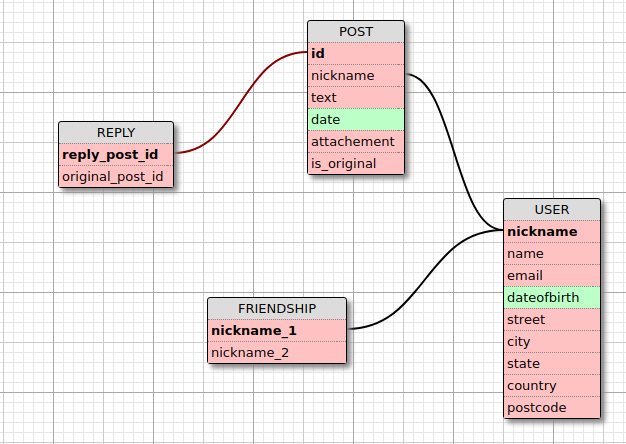

In [6]:
from IPython.display import Image
Image("social_network.png")

#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

First question we need to answer is how we can define which posts the user wants to see and how we define "interest".
Several options are considered :
- A user may want to see 'popular' posts : posts which have been replied most.
- We also could define best friend as person with whom he has most common friends.
- He may want to see posts from people he often replies to.
- He also wants to see recent posts more than old posts.

We need to hierarchize these information, we will order this way :
1. Date
2. People he often replies to
3. Posts which have more replies
4. Friends in common.

--
- To do so, we already have a date attribute in the POST relation, we will order by day.
- We need to create a count to know how many times the user replied to a friend's post.
- We need to create a count to know how many replies has a specific post.
- We need to create a count to know how many common friends a user has with his friends

Then, we take the table containing all posts from all friends and order it.